In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

In [3]:
# Load prepared data csv file 
df = pd.read_csv("prepared_spotify_data.csv")

In [4]:
df.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,hour,day,month,minutes_played,track_artist
0,2025-01-01 05:11:45+00:00,osx,158443,TT,deja vu,Olivia Rodrigo,SOUR,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,trackdone,endplay,False,True,False,1735679560,False,5,Wednesday,2025-01,2.640717,deja vu - Olivia Rodrigo
1,2025-01-01 05:14:52+00:00,osx,188306,TT,Crash My Car,COIN,Dreamland,spotify:track:5SN3mwuodiwY3jPejBuUD5,clickrow,trackdone,False,False,False,1735708304,False,5,Wednesday,2025-01,3.138433,Crash My Car - COIN
2,2025-01-01 05:18:50+00:00,osx,177280,TT,Everybody Talks,Neon Trees,Picture Show,spotify:track:2iUmqdfGZcHIhS3b9E9EWq,trackdone,trackdone,False,False,False,1735708522,False,5,Wednesday,2025-01,2.954667,Everybody Talks - Neon Trees
3,2025-01-01 05:22:13+00:00,osx,202496,TT,She Looks So Perfect,5 Seconds of Summer,5 Seconds Of Summer,spotify:track:1CQ2cMfrmFM1YdfmjENKVE,trackdone,trackdone,False,False,False,1735708730,False,5,Wednesday,2025-01,3.374933,She Looks So Perfect - 5 Seconds of Summer
4,2025-01-01 05:25:51+00:00,osx,218013,TT,Tongue Tied,GROUPLOVE,Never Trust a Happy Song,spotify:track:0GO8y8jQk1PkHzS31d699N,trackdone,trackdone,False,False,False,1735708933,False,5,Wednesday,2025-01,3.633550,Tongue Tied - GROUPLOVE


#### What songs and artists had the longest total listening time?

In [5]:
song_time = df.groupby('track_artist')['minutes_played'].sum()
top_songs = song_time.sort_values(ascending=False)
top_songs.head(10)

track_artist
Eye to Eye - Nico & Chelsea                                    1840.049750
505 - Arctic Monkeys                                            582.454033
My Life Is Over - Chelsea Collins                               384.471100
Cupid's Chokehold / Breakfast in America - Gym Class Heroes     356.424283
BRAINDEAD - WesGhost                                            303.028200
dead girl dreaming - Ellise                                     277.658133
leech - Ellise                                                  241.981133
Brooklyn Baby - Lana Del Rey                                    213.464683
Mary On A Cross - Ghost                                         206.212917
Creep - Radiohead                                               181.206433
Name: minutes_played, dtype: float64

Damn! Eye to Eye played 30 ish hours??? 505 Is a third of that! Wow!

In [6]:
artist_time = df.groupby('master_metadata_album_artist_name')['minutes_played'].sum()
top_artists = artist_time.sort_values(ascending=False)
top_artists.head(10)

master_metadata_album_artist_name
Ellise             3100.794050
Vlad Holiday       2609.252283
Nico & Chelsea     2050.642000
Nico Collins       1488.557067
Waterparks         1477.019333
WesGhost           1298.274417
Arctic Monkeys      993.328583
Chelsea Collins     770.798417
Machel Montano      681.928300
Kes                 676.053050
Name: minutes_played, dtype: float64

50 hours of Ellise? Wow.

#### What time of the day did I do the most intentional listening?

In [7]:
# Define a function to assign time-of-day 
def time_bucket(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Late Night'

In [8]:
df['time_of_day'] = df['hour'].apply(time_bucket)
tod_plays = df.groupby('time_of_day')['minutes_played'].sum()

tod_order = ['Morning', 'Afternoon', 'Evening', 'Late Night']
tod_plays = tod_plays.reindex(tod_order)

tod_plays.sort_values(ascending=False).head()

time_of_day
Late Night    19718.438800
Evening        7243.540017
Afternoon      6908.605283
Morning         533.030533
Name: minutes_played, dtype: float64

This makes sense. I'm a college student who studied between 8pm and 2am during finals week. In the mornings and afternoons, I only listened to music to walk to classes and back to my dorm. 

In [9]:
hourly_play = df.groupby('hour')['minutes_played'].sum()
hourly_play.sort_values(ascending=False).head(10)

hour
1     3297.707700
2     2933.209917
0     2841.564300
23    2834.590567
3     2188.781767
21    2138.253267
22    2001.786383
20    1896.801750
15    1839.726850
17    1839.292183
Name: minutes_played, dtype: float64

1AM BABYYYYY (My fave hour to study and listen to music).

<Axes: title={'center': 'Total Listening Time by the Hour'}, xlabel='Hour', ylabel='Minutes Played'>

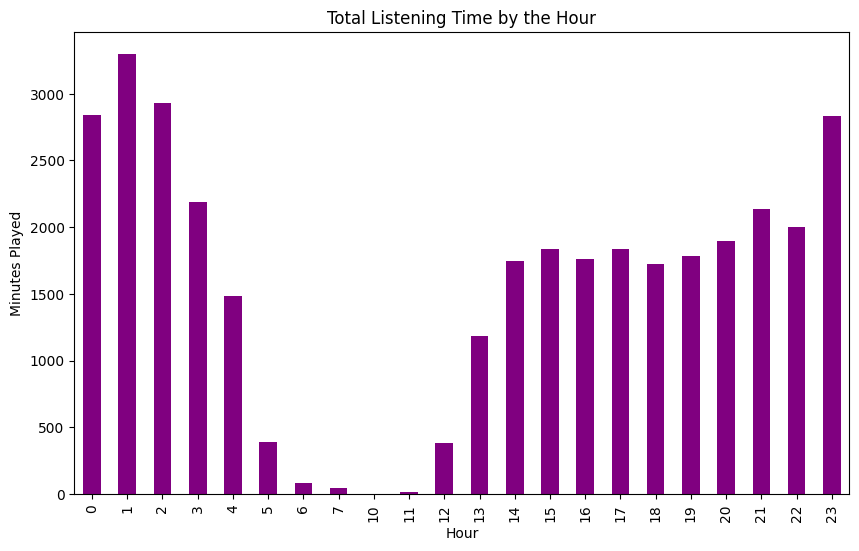

In [10]:
hourly_play.plot(kind='bar',
                 figsize=(10,6),
                 title='Total Listening Time by the Hour',
                 xlabel='Hour',
                 ylabel='Minutes Played',
                 color='purple')

#### Consider the time spent listening to a specific artist by time of day

Note: In this section, I chose artists I knew I didn't listen to as much as the top 5 artists. The 3 artists below are not artists I typically listened to on loop when studying, or on shuffle when walking. The top 5 are!

In [11]:
artist_tod = df.groupby(['master_metadata_album_artist_name', 'time_of_day'])['minutes_played'].sum().reset_index()

artist_tod[artist_tod['master_metadata_album_artist_name'] == 'Chelsea Collins']

,master_metadata_album_artist_name,time_of_day,minutes_played
168,Chelsea Collins,Afternoon,72.542817
169,Chelsea Collins,Evening,184.084717
170,Chelsea Collins,Late Night,514.170883


In [12]:
artist_tod[artist_tod['master_metadata_album_artist_name'] == 'Aidan Bissett']

,master_metadata_album_artist_name,time_of_day,minutes_played
28,Aidan Bissett,Afternoon,68.58955
29,Aidan Bissett,Evening,109.74035
30,Aidan Bissett,Late Night,223.32035
31,Aidan Bissett,Morning,2.73305


In [13]:
artist_tod[artist_tod['master_metadata_album_artist_name'] == 'Sabrina Carpenter']

,master_metadata_album_artist_name,time_of_day,minutes_played
836,Sabrina Carpenter,Afternoon,120.982217
837,Sabrina Carpenter,Evening,114.518233
838,Sabrina Carpenter,Late Night,341.420933


I love Manchild bro. It's so good.

In [14]:
top_artists = df.groupby('master_metadata_album_artist_name')['minutes_played'].sum().nlargest(5).index
top_df = df[df['master_metadata_album_artist_name'].isin(top_artists)]

artist_tod = top_df.groupby(['master_metadata_album_artist_name', 'time_of_day'])['minutes_played'].sum().reset_index()

artist_tod

,master_metadata_album_artist_name,time_of_day,minutes_played
0,Ellise,Afternoon,972.910717
1,Ellise,Evening,599.091833
2,Ellise,Late Night,1526.773033
3,Ellise,Morning,2.018467
4,Nico & Chelsea,Afternoon,320.821333
5,Nico & Chelsea,Evening,354.613283
6,Nico & Chelsea,Late Night,1371.943683
7,Nico & Chelsea,Morning,3.263700
8,Nico Collins,Afternoon,290.996167
9,Nico Collins,Evening,491.692933


Would you believe that for Nico & Chelsea, I only listened to one song? 'Eye to Eye' like 100 times each session.

#### Which days of the week do I listen to music most?

In [15]:
day_of_week_play = df.groupby('day')['minutes_played'].sum()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_play = day_of_week_play.reindex(day_order)

day_of_week_play

day
Sunday       5573.160450
Monday       5010.166667
Tuesday      4957.240867
Wednesday    5046.213917
Thursday     5694.180117
Friday       4013.745983
Saturday     4108.906633
Name: minutes_played, dtype: float64

[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday')]

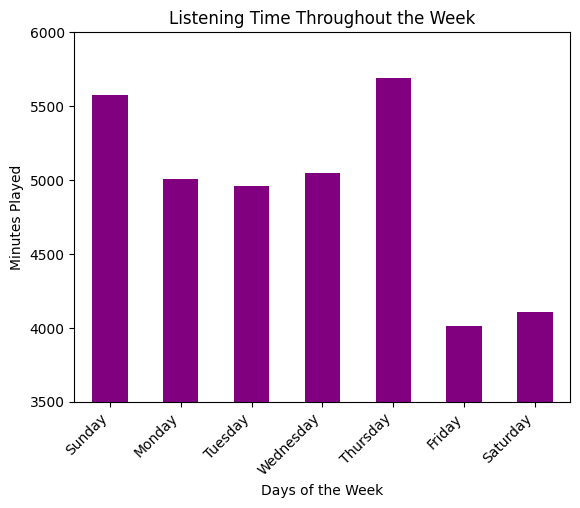

In [16]:
ax = day_of_week_play.plot(kind='bar', color='purple')
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Minutes Played')
ax.set_title("Listening Time Throughout the Week")

ax.set_ylim(3500, 6000)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

I don't know what I was expecting, but I guess Thursdays are just the superior day to listen to music. Sundays are shrouded in the mystery of "Will I do laundry today, or will I get sidetracked and walk around campus on the phone with my best friend?" So, that makes sense.

#### What months had noticeable spikes in music streaming? Why?

In [17]:
monthly_play = df.groupby('month')['minutes_played'].sum()
monthly_play

month
2025-01    2766.696900
2025-02    5039.804750
2025-03    6103.215017
2025-04    5609.536983
2025-05    5975.905767
2025-06    6541.215783
2025-07    2367.239433
Name: minutes_played, dtype: float64

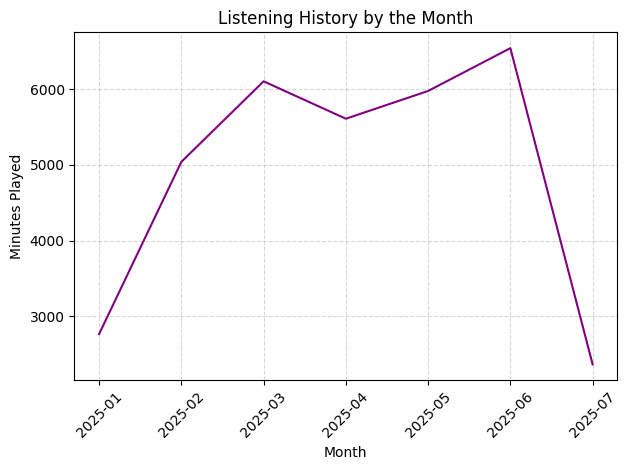

In [18]:
ax = monthly_play.plot(kind='line', color='purple')
ax.set_xlabel('Month')
ax.set_ylabel('Minutes Played')
ax.set_title('Listening History by the Month')

ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Let's see what I was doing for each of these months.

**January** - 2767 minutes

- I was freezing my butt off!!! Florida winter is not for the Caribbean lighthearted. Otherwise, I have no idea.

**February** - 5040 minutes

- February was definitely interesting. I fell in love, and so there was a lot of manifestation music (as one does). It was mainly Ellise and Vlad Holiday if my memory serves me correctly. There were many tears, many late night yap sessions, many missed morning classes (whoops), many minutes of manifestation and reflection, and many emotions.

**March** - 6104 minutes

- March. LOTS of tears and overthinking. This month was definitely tough. My dad passed away on the 2nd, and his birthday was the 7th (2013), and it was my first time dealing with it alone, so, tough. Much distraction music was needed. The late night yap sessions continued.

**April** - 5610 minutes

- GREAT MONTH. Finally started dating that guy I fell in love with :). Much much much music was listened to this month. I was a happy camper this month (other than crashing out about changing my major). Woop Woop. I started spending all of my time at the library preparing for finals! This is where I started looping WesGhost's and Ellise's new albums (at the time).

**May** - 5976 minutes

- BIRTHMONTH!!! Also finals week right before my birthday. That's a hell of a lot of music listening! I also started a humanities course late at night, so that definitely contributes to my '505' by Arctic Monkeys streams.

**June** - 6542 minutes

- I started my Data Science professional certificate on Coursera!! Lot more late nights streaming 'Creep', 'Cupid's Chokehold', '505' and a few other songs from my boyfriend's playlist. (I eventually made my own goated af playlist don't worry!). 

**July** - 2368 minutes (as of the halfway point)

- Yeah. As of the time I'm making this, I've streaming 'My Life is Over' by Chelsea Collins, 'Red Guitar' by Waterparks, and 'dying on the inside' by Nessa Barrett. These loops will not be considered in this analysis, unfortunately. But, it probably is very predictable that I loop new songs, based on my previous listening history.


#### Most Listening Artist Over Time

How did my top artist change each month?

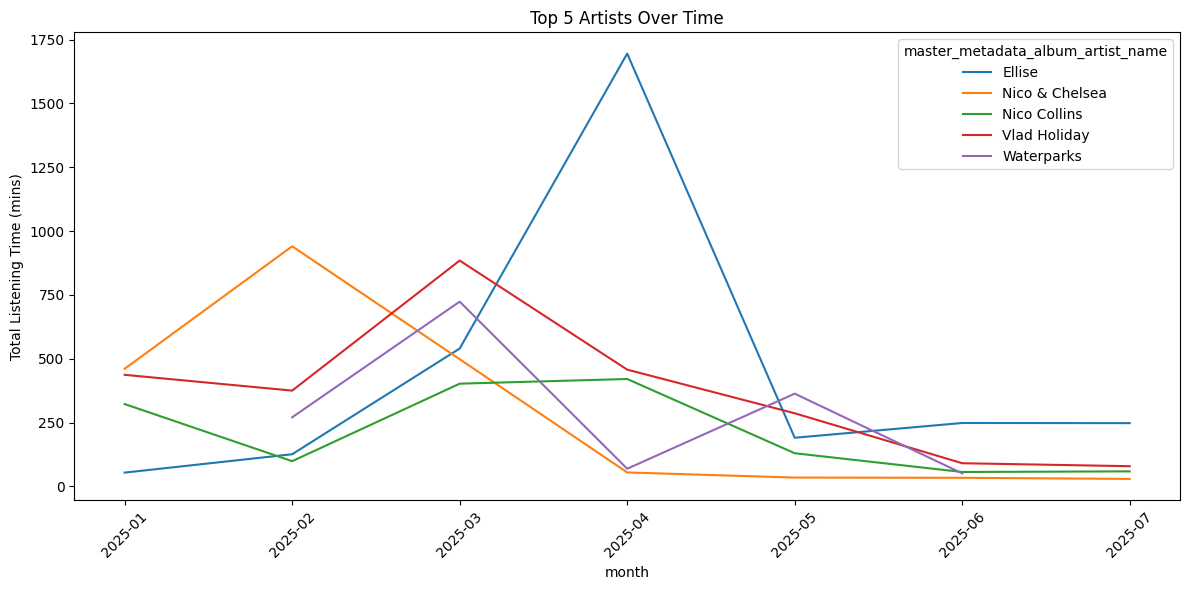

In [23]:
artist_monthly = (
    df.groupby(['month', 'master_metadata_album_artist_name'])['minutes_played']
    .sum()
    .reset_index()
)

top_artists = (
    artist_monthly.groupby('master_metadata_album_artist_name')['minutes_played']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

filtered = artist_monthly[artist_monthly['master_metadata_album_artist_name'].isin(top_artists)]

plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x='month', y='minutes_played', hue='master_metadata_album_artist_name')
plt.title('Top 5 Artists Over Time')
plt.xticks(rotation=45)
plt.ylabel("Total Listening Time (mins)")
plt.tight_layout()
plt.show()

#### Song Duration Trends

Do I tend to listen to longer or shorter songs?

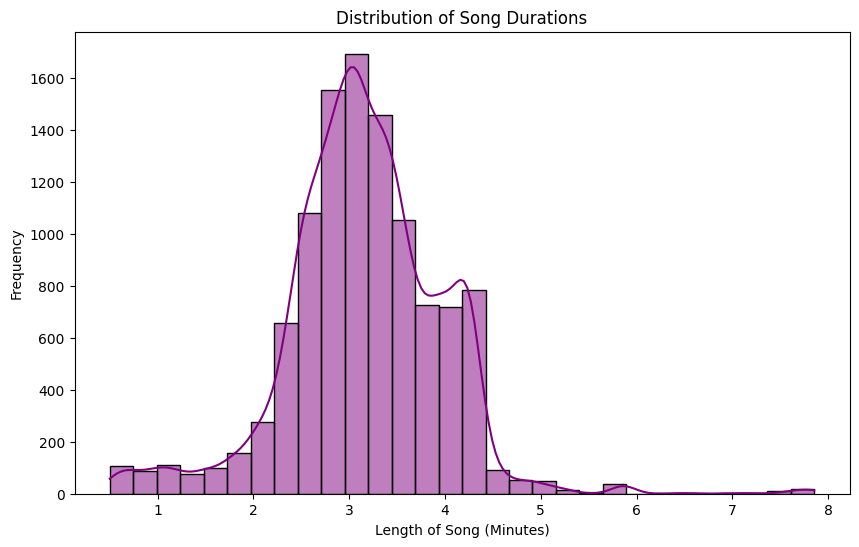

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(df['minutes_played'], bins=30, kde=True, color='purple')
plt.title("Distribution of Song Durations")
plt.xlabel("Length of Song (Minutes)")
plt.ylabel("Frequency")
plt.show()

So, the only 7-8 minute-ish length song I know is "Let it Happen" by Tame Impala lmao, and I don't listen to it a tonnnn. The average length of a song is 2-3 minutes, so this makes sense. :)

#### Album vs Single

Am I more of a single-drop listener, or a full-album enjoyer?

In [28]:
# Count tracks per album
album_counts = df.groupby(['master_metadata_album_album_name', 'master_metadata_album_artist_name'])['master_metadata_track_name'].nunique().reset_index()
album_counts.columns = ['master_metadata_album_album_name', 'master_metadata_album_artist_name', 'track_count']

# Label the type
def classify_album(n):
    if n == 1:
        return 'Single'
    elif n <= 6:
        return 'EP'
    else:
        return 'Album'

album_counts['album_type'] = album_counts['track_count'].apply(classify_album)

# Merge back to main dataframe
df = df.merge(album_counts[['master_metadata_album_album_name', 'master_metadata_album_artist_name', 'album_type']], on=['master_metadata_album_album_name', 'master_metadata_album_artist_name'], how='left')

df.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,...,offline_timestamp,incognito_mode,hour,day,month,minutes_played,track_artist,time_of_day,album_type_x,album_type_y
0,2025-01-01 05:11:45+00:00,osx,158443,TT,deja vu,Olivia Rodrigo,SOUR,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,trackdone,endplay,...,1735679560,False,5,Wednesday,2025-01,2.640717,deja vu - Olivia Rodrigo,Morning,Album,Album
1,2025-01-01 05:14:52+00:00,osx,188306,TT,Crash My Car,COIN,Dreamland,spotify:track:5SN3mwuodiwY3jPejBuUD5,clickrow,trackdone,...,1735708304,False,5,Wednesday,2025-01,3.138433,Crash My Car - COIN,Morning,Single,Single
2,2025-01-01 05:18:50+00:00,osx,177280,TT,Everybody Talks,Neon Trees,Picture Show,spotify:track:2iUmqdfGZcHIhS3b9E9EWq,trackdone,trackdone,...,1735708522,False,5,Wednesday,2025-01,2.954667,Everybody Talks - Neon Trees,Morning,Single,Single
3,2025-01-01 05:22:13+00:00,osx,202496,TT,She Looks So Perfect,5 Seconds of Summer,5 Seconds Of Summer,spotify:track:1CQ2cMfrmFM1YdfmjENKVE,trackdone,trackdone,...,1735708730,False,5,Wednesday,2025-01,3.374933,She Looks So Perfect - 5 Seconds of Summer,Morning,Single,Single
4,2025-01-01 05:25:51+00:00,osx,218013,TT,Tongue Tied,GROUPLOVE,Never Trust a Happy Song,spotify:track:0GO8y8jQk1PkHzS31d699N,trackdone,trackdone,...,1735708933,False,5,Wednesday,2025-01,3.633550,Tongue Tied - GROUPLOVE,Morning,Single,Single


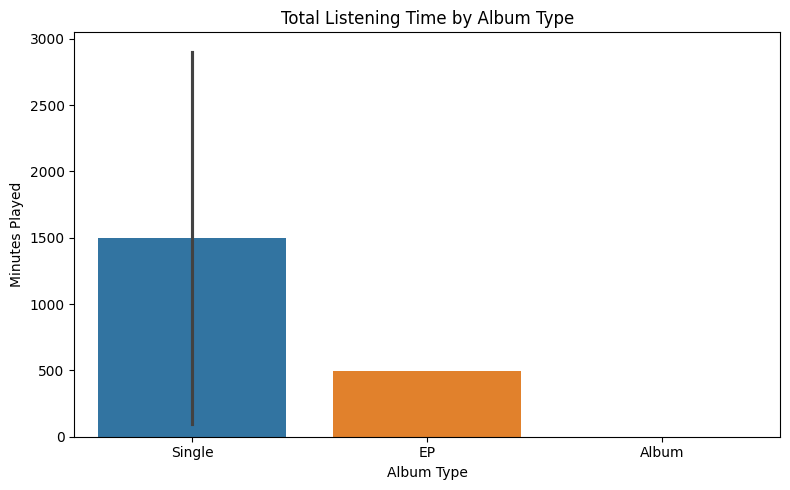

In [33]:
album_type_summary = df.groupby(album_counts['album_type'])['minutes_played'].sum().reset_index()
album_type_summary = album_type_summary.sort_values(by='minutes_played', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=album_type_summary, x=album_counts['album_type'], y='minutes_played', hue=album_counts['album_type'], legend=False)

plt.title("Total Listening Time by Album Type")
plt.xlabel('Album Type')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

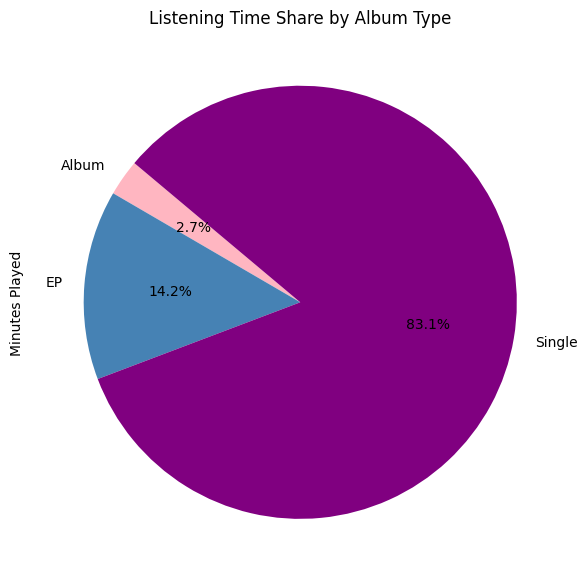

In [42]:
album_pie = df.groupby(album_counts['album_type'])['minutes_played'].sum()

plt.figure(figsize=(6,6))
album_pie.plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightpink', 'steelblue', 'purple'])

plt.title('Listening Time Share by Album Type')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

Singles are just better in my opinion. (apparently)

#### One-Hit Wonders vs Repeat Offenders

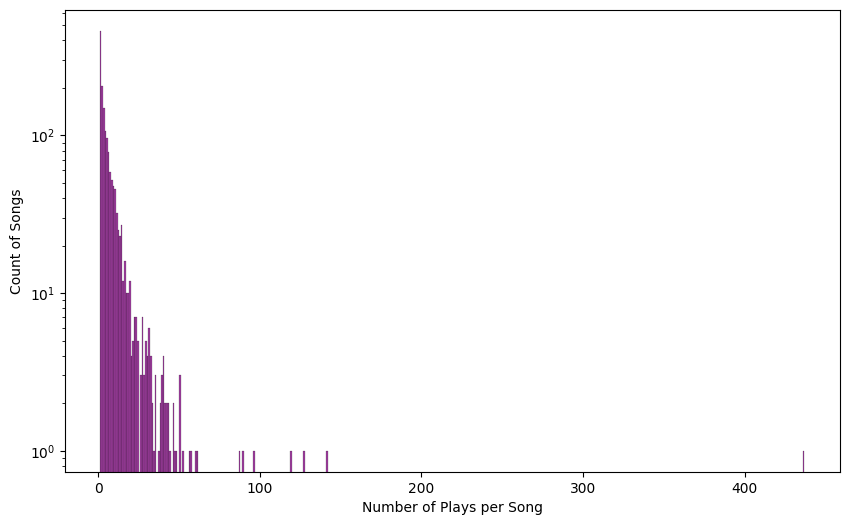

In [47]:
song_counts = df.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.histplot(song_counts['count'], bins=range(1, song_counts['count'].max()+1), color='purple')
plt.xlabel("Number of Plays per Song")
plt.ylabel("Count of Songs")
plt.yscale('log')
plt.show()

Man I love listening to one-hit wonders...... I really thought there would be more "repeat offenders"

#### Word Cloud of Track Names

In [49]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 168 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


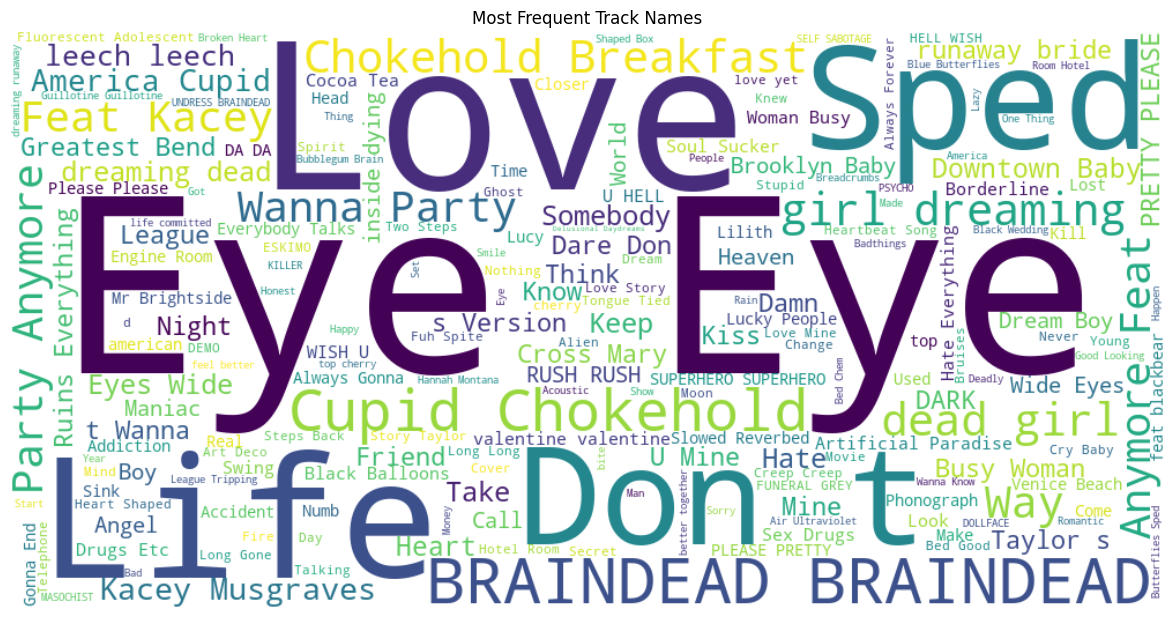

In [51]:
from wordcloud import WordCloud

all_tracks = ' '.join(df['master_metadata_track_name'].dropna().astype(str))

wc = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(all_tracks)

plt.figure(figsize=(15,7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Track Names")
plt.show()

Looks like 'Eye to Eye' by Nico & Chelsea is a winner winner chicken dinner!!!

In [55]:
# Save as csv file to load in another notebook
df.to_csv("explored_spotify_data.csv", index=False)